<a href="https://colab.research.google.com/github/keizikang/self_study_mldl/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_6%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# 6. 비지도 학습
---


---
## 6-1. 군집 알고리즘
---

--2022-08-12 16:46:32--  https://tinyurl.com/2gc3eqpe
Resolving tinyurl.com (tinyurl.com)... 104.20.138.65, 104.20.139.65, 172.67.1.225, ...
Connecting to tinyurl.com (tinyurl.com)|104.20.138.65|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gist.githubusercontent.com/rickiepark/b90b9f725890653e69a1a52943671c62/raw/47919a9740cc97eed743d229d25820225c6e5c9e/bream_smelt_list.py [following]
--2022-08-12 16:46:33--  https://gist.githubusercontent.com/rickiepark/b90b9f725890653e69a1a52943671c62/raw/47919a9740cc97eed743d229d25820225c6e5c9e/bream_smelt_list.py
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 746 [text/plain]
Saving to: ‘fish_data.py’

fish_data.py        100%[===================>]     746  --.-K

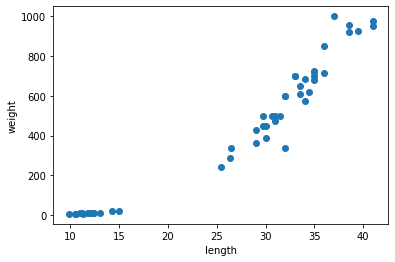

In [2]:
# wget으로 파일을 가져올 수 있다
# content에 저장됨
!wget https://tinyurl.com/2gc3eqpe -O fish_data.py
from fish_data import *
import matplotlib.pyplot as plt

plt.scatter(fish_length, fish_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
!wget http://bit.ly/fruits_300_data -O fruits_300.npy

--2022-08-12 16:46:39--  http://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-08-12 16:46:39--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-08-12 16:46:40--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connect

In [4]:
import numpy as np
import matplotlib.pyplot as plt
fruits = np.load('fruits_300.npy')
# 300장의 이미지(사과/파인애플/바나나 각각 100장)
# 각 이미지는 100 x 100

fruits[0] # 사과 이미지 하나, 100 x 100

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

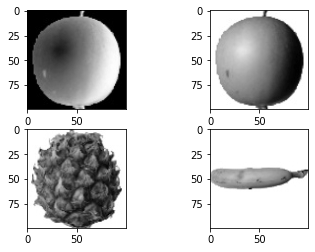

In [3]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(fruits[0], cmap='gray')  # 이미지는 반전되어 있음
axs[0, 1].imshow(fruits[0], cmap='gray_r')  # 반전을 다시 반전시킴
axs[1, 0].imshow(fruits[100], cmap='gray_r')  # 파인애플
axs[1, 1].imshow(fruits[200], cmap='gray_r')  # 버내너
plt.show()

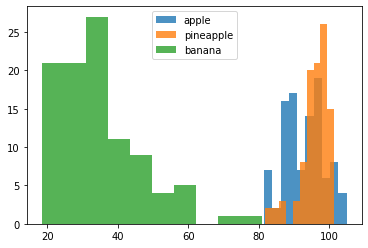

In [5]:
# 과일별로 이미지 전체의 평균 픽셀값을 구해보자
# 100 x 100 이미지를 펼쳐서 1 x 10000 ndarray로 바꿈
apple = fruits[0:100].reshape(-1, 100*100)  # shape (100, 10000)
pineapple = fruits[100:200].reshape(-1, 100*100)  # shape (100, 10000)
banana = fruits[200:300].reshape(-1, 100*100)  # shape (100, 10000)

# axis=1 방향으로 평균 내면 각 이미지당 평균값이 나옴
# 사과, 파인애플, 바나나의 이미지 평균 픽셀값의 분포를 보자
plt.hist(np.mean(apple, axis=1), alpha=0.8, label='apple')
plt.hist(np.mean(pineapple, axis=1), alpha=0.8, label='pineapple')
plt.hist(np.mean(banana, axis=1), alpha=0.8, label='banana')
plt.legend()
plt.show()

---
결과를 보면 바나나는 평균 픽셀값이 낮음. 바나나의 크기가 작기 때문.

사과랑 파인애플은 히스토그램만으로는 구별이 잘 안됨

과일별 평균 이미지를 그려보자.

---

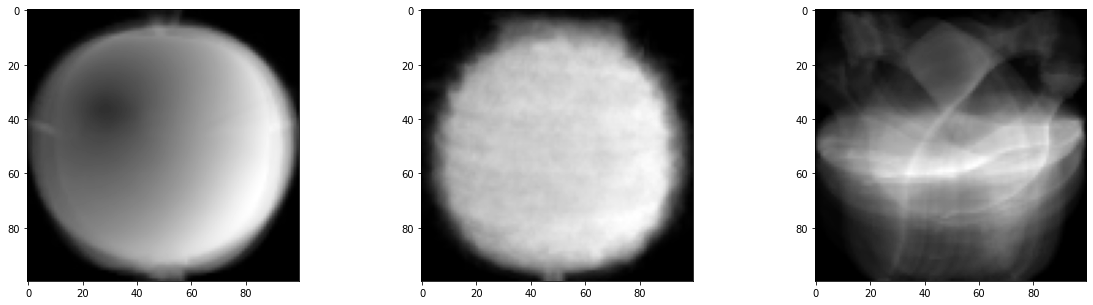

In [6]:
# 각 과일별로 평균 이미지를 그려보자
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray')
axs[1].imshow(pineapple_mean, cmap='gray')
axs[2].imshow(banana_mean, cmap='gray')
plt.show()

---

특징이 보임

* 사과: foreground가 많으며 foreground 내에서도 밝기가 일정하지 않음

* 파인애플: foreground가 많으며 foreground 내에서는 밝기가 균일한 편

* 바나나: foreground가 적고, 바나나마다 놓인 방향이 일정하지 않음

픽셀 10000개의 평균 픽셀값을 plot 해보자

---

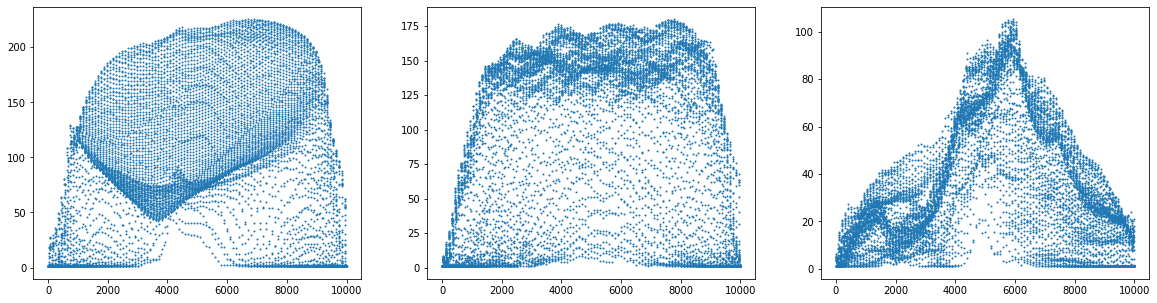

In [13]:
# axis=0 방향으로 평균 내면 각 픽셀당 평균값이 나옴
# 사과, 파인애플, 바나나의 평균 이미지를 그려보자
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].scatter(range(10000), np.mean(apple, axis=0), label='apple', s=1)
axs[1].scatter(range(10000), np.mean(pineapple, axis=0), label='pineapple', s=1)
axs[2].scatter(range(10000), np.mean(banana, axis=0), label='banana', s=1)
plt.show()

---

책과는 다르게 bar가 아니라 scatter로 그렸음

그 이유는 밑에서 다시 설명하겠음

우선 그래프 보는 법

* 100 x 100 이미지를 1 x 10000으로 펼친 후 plot 한 것임
* 그래프의 좌/중/우측이 이미지의 상/중/하단에 해당됨

이 그래프에서도 특징이 보임

* 사과
  * 그래프 위쪽의 넓고 고르게 밀한 영역이 foreground에 해당되는 것으로 보임
  * 파인애플에 비해 foreground 내에서 픽셀값이 넓게 분포함
  * 넓은 영역의 아래쪽에 점이 더 밀한 영역이 foreground 좌상단의 어두운 영역일 듯

* 파인애플
  * 사과와 foreground 영역 면적은 비슷함
  * 확실히 사과에 비해 foreground 픽셀값이 150 근처에 집중되어 있음
  * 사실 히스토그램에서도 이 점은 보였으나 명확하지 않았을 뿐임

* 바나나
  * 위아래는 어둡고 가운데가 밝음
  * 사과, 파인애플에 비해 평균적으로 어두움

---

bar로 그리면 선이 겹쳐서 제대로 표시가 되지 않음

아래 코드는 사과 이미지 중간을 가로로 자르는 딱 한줄의

사과 100장 전체에 대한 이미지와 bar graph임

---

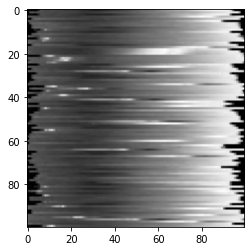

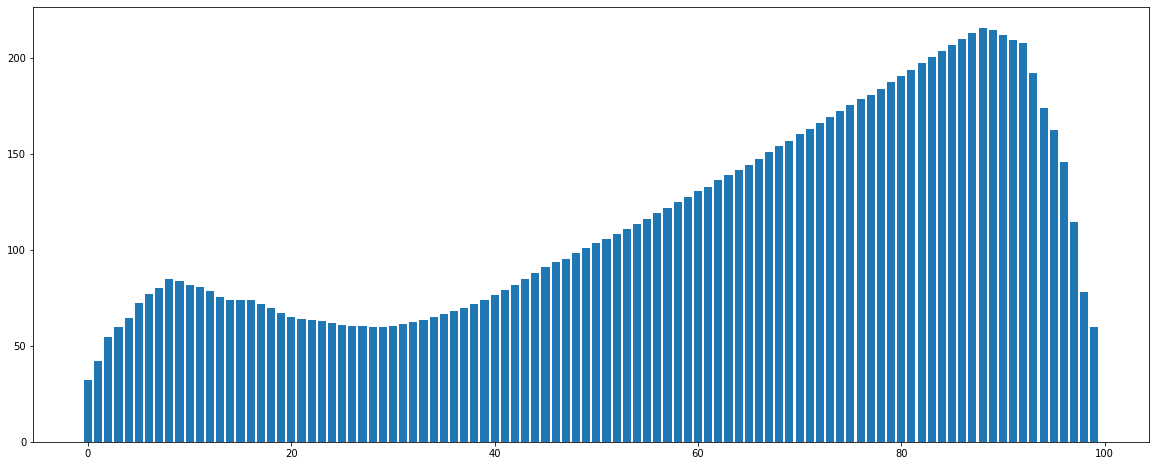

In [21]:
pmin = 4500
pmax = 4600

plt.imshow(apple[:, pmin:pmax], cmap='gray')
plt.show()

plt.figure(figsize=(20, 8))
plt.bar(range(pmax - pmin), np.mean(apple[:, pmin:pmax], axis=0))
plt.show()

---

이걸 한줄이 아니라 다섯 줄에 대해서 그려보면

bar graph가 이상해지는게 보임

---

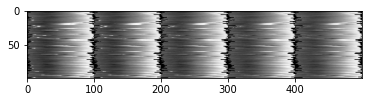

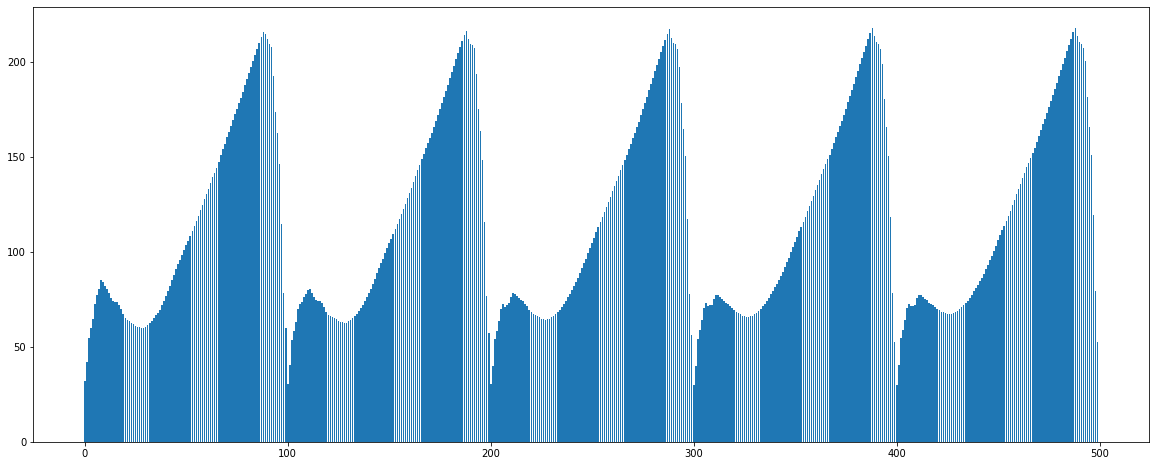

In [22]:
pmin = 4500
pmax = 5000

plt.imshow(apple[:, pmin:pmax], cmap='gray')
plt.show()

plt.figure(figsize=(20, 8))
plt.bar(range(pmax - pmin), np.mean(apple[:, pmin:pmax], axis=0))
plt.show()

---

이유는 bar의 width에 있음

width는 bar의 폭인데, 기본값이 0.8임

그런데 figure size에 비해 bar가 너무 많으면

bar들이 겹칠 것임

그리고 pyplot.bar는 정확히 겹치는 bar가 있으면 아예 안그리는 것 같음

해결책: width=1로 설정하면 됨

---


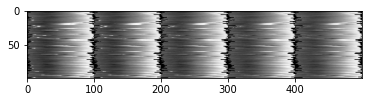

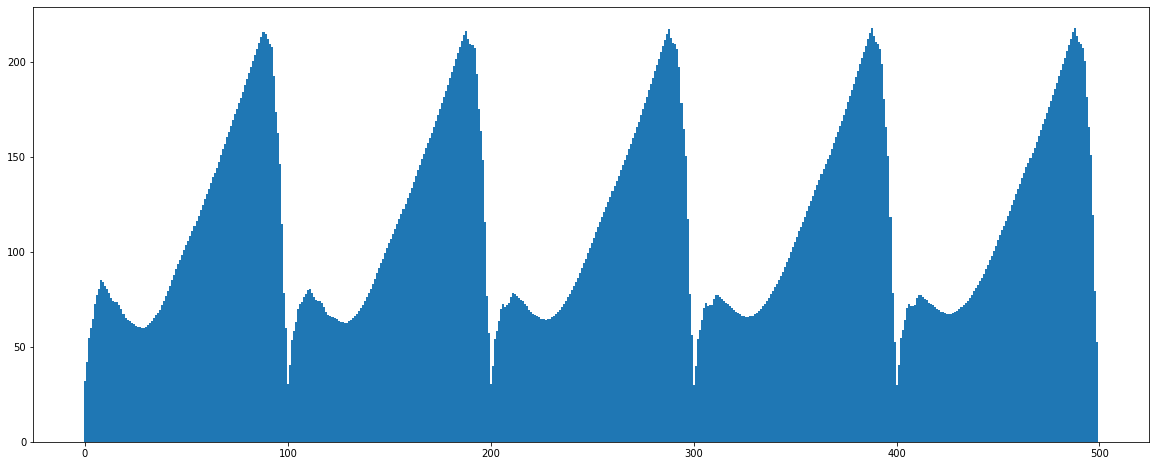

In [33]:
pmin = 4500
pmax = 5000

plt.imshow(apple[:, pmin:pmax], cmap='gray')
plt.show()

plt.figure(figsize=(20, 8))
plt.bar(range(pmax - pmin), np.mean(apple[:, pmin:pmax], axis=0), width=1)
plt.show()

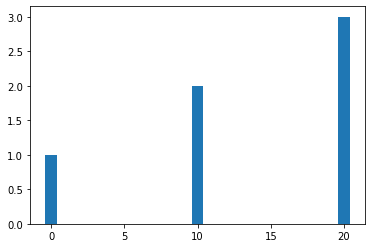

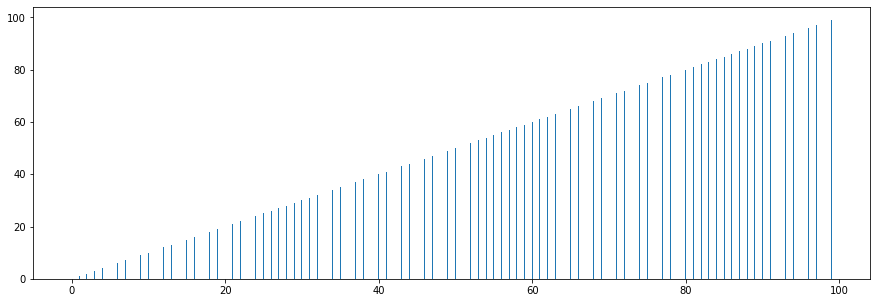

In [65]:
# bar width 테스트용 코드
plt.bar([0, 10, 20], [1, 2, 3], width=.8)
plt.show()

fig = plt.figure(figsize=(15, 5))
plt.bar(range(100), range(100), width=.1)
plt.show()

---

본론으로 돌아와서, 

각 이미지에서 사과 이미지를 빼고 절대값의 평균을 계산해보자.

이 값이 작은 것들이 사과일 것이다.

---

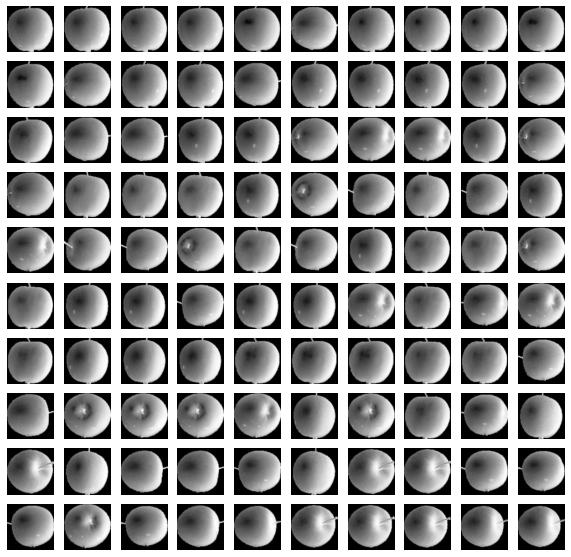

In [34]:
abs_diff = np.abs(fruits - apple_mean)  # 크기를 알아서 맞춰준다
abs_mean = np.mean(abs_diff, axis=(1, 2))

# 오름차순 정렬 후 앞 100개의 인덱스
apple_index = np.argsort(abs_mean)[:100]

fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray')
    axs[i, j].axis('off')
plt.show()

---

사과만 나왔음.

파인애플, 바나나도 해보자

위 코드에서 사과가 나왔다고 해서, 파인애플로 똑같이 돌렸을 때

사과가 나오지 않는다는 보장은 없다.

---

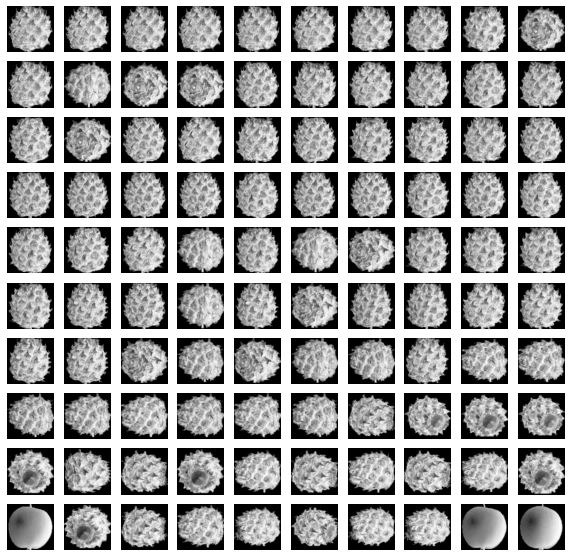

In [35]:
abs_diff = np.abs(fruits - pineapple_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))

# 오름차순 정렬 후 앞 100개의 인덱스
pineapple_index = np.argsort(abs_mean)[:100]

fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[pineapple_index[i*10 + j]], cmap='gray')
    axs[i, j].axis('off')
plt.show()

---

역시 오류가 생겼다

바나나도 해보자

---

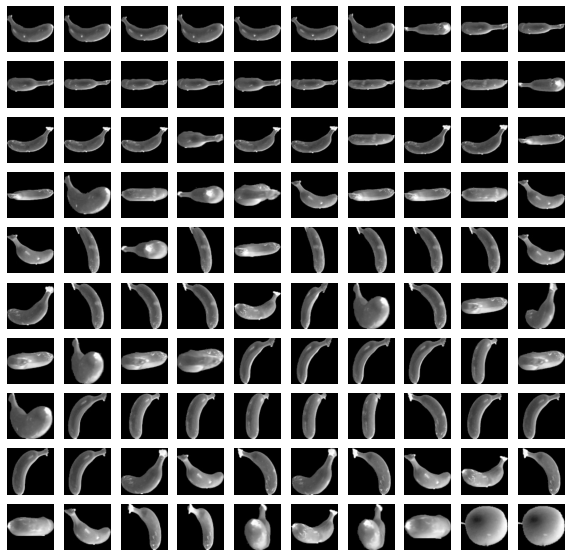

In [36]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))

# 오름차순 정렬 후 앞 100개의 인덱스
banana_index = np.argsort(abs_mean)[:100]

fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap='gray')
    axs[i, j].axis('off')
plt.show()

---

여기서도 사과 이미지가 섞여 들어갔다.

그 이유를 알아보자. 

전체 300개 이미지에서 apple_mean을 빼고 절대값의 평균을 plot 해보자

---

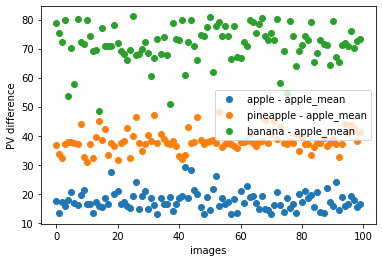

In [37]:
abs_diff = np.abs(fruits - apple_mean)  # 크기를 알아서 맞춰준다
abs_mean = np.mean(abs_diff, axis=(1, 2))

plt.scatter(range(100), abs_mean[:100], label='apple - apple_mean')
plt.scatter(range(100), abs_mean[100:200], label='pineapple - apple_mean')
plt.scatter(range(100), abs_mean[200:], label='banana - apple_mean')
plt.legend()
plt.xlabel('images')
plt.ylabel('PV difference')
plt.show()

---

같은 그래프를 pineapple에 대해서도 그렸을 때

위와 똑같은 그래프가 평행이동할 것이라고 생각하면 안된다.

사과 평균 이미지와 파인애플 평균 이미지는 완전히 별개이기 때문

---

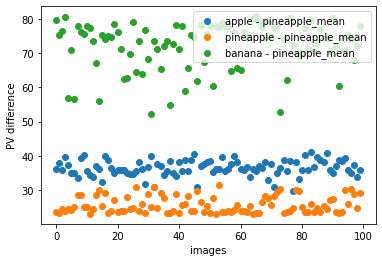

In [ ]:
abs_diff = np.abs(fruits - pineapple_mean)  # 크기를 알아서 맞춰준다
abs_mean = np.mean(abs_diff, axis=(1, 2))

plt.scatter(range(100), abs_mean[:100], label='apple - pineapple_mean')
plt.scatter(range(100), abs_mean[100:200], label='pineapple - pineapple_mean')
plt.scatter(range(100), abs_mean[200:], label='banana - pineapple_mean')
plt.legend(loc='upper right')
plt.xlabel('images')
plt.ylabel('PV difference')
plt.show()

---

주황색 영역을 침범한 파란색 점이 보이는가? 쟤네가 범인이다.

바나나도 똑같이 해보자.

---

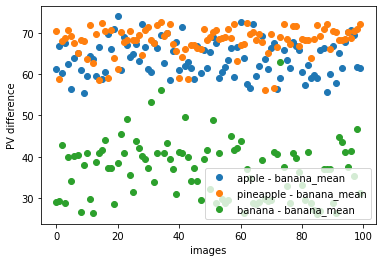

In [ ]:
abs_diff = np.abs(fruits - banana_mean)  # 크기를 알아서 맞춰준다
abs_mean = np.mean(abs_diff, axis=(1, 2))

plt.scatter(range(100), abs_mean[:100], label='apple - banana_mean')
plt.scatter(range(100), abs_mean[100:200], label='pineapple - banana_mean')
plt.scatter(range(100), abs_mean[200:], label='banana - banana_mean')
plt.legend(loc='lower right')
plt.xlabel('images')
plt.ylabel('PV difference')
plt.show()

---

잡았다 요놈!

---

* 군집clustering: 비슷한 샘플끼리 그룹으로 모으는 작업
* 클러스터cluster: 군집 알고리즘에서 만든 그룹

---

그런데 생각해보면 위 방식은 비지도라고 부를 수 없다.

어떤 이미지가 사과인지 알고 사과의 평균 이미지를 이용했으니까

그럼 제대로 비지도 학습을 하려면 어떻게?

---

---

## 6-2. k-평균

---

일단 내가 봤던 k-means clustering 영상 소개

https://www.youtube.com/watch?v=dxOldlIBx0Q

---


In [38]:
fruits_2d = fruits.reshape(-1, 100*100)

# k-평균은 사이킷런의 KMeans를 이용
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)
print(km.labels_)

# label 당 샘플 개수 확인
print(np.unique(km.labels_, return_counts=True))

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


In [45]:
# label 별로 이미지를 그려보자
def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, 
                          figsize=(cols*ratio, rows*ratio),
                          squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i, j].axis('off')
  plt.show()  

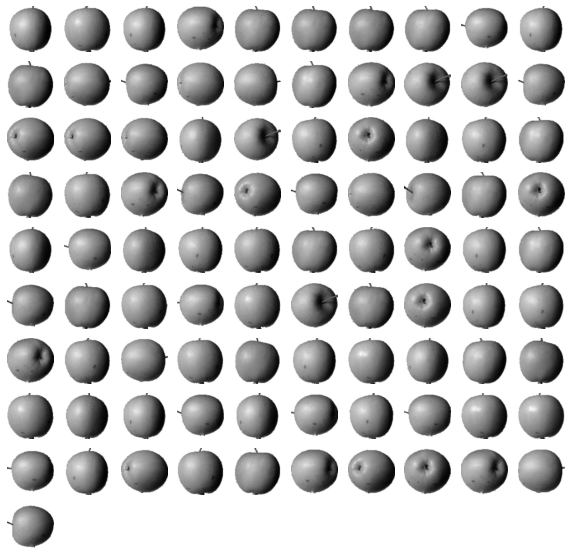

In [ ]:
draw_fruits(fruits[km.labels_==2])

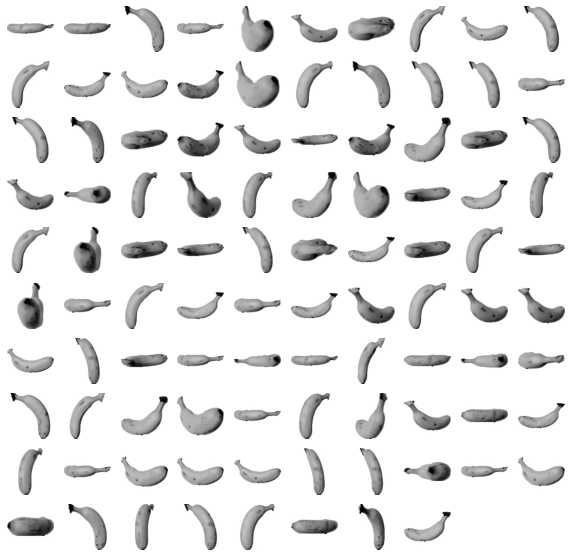

In [ ]:
draw_fruits(fruits[km.labels_==1])

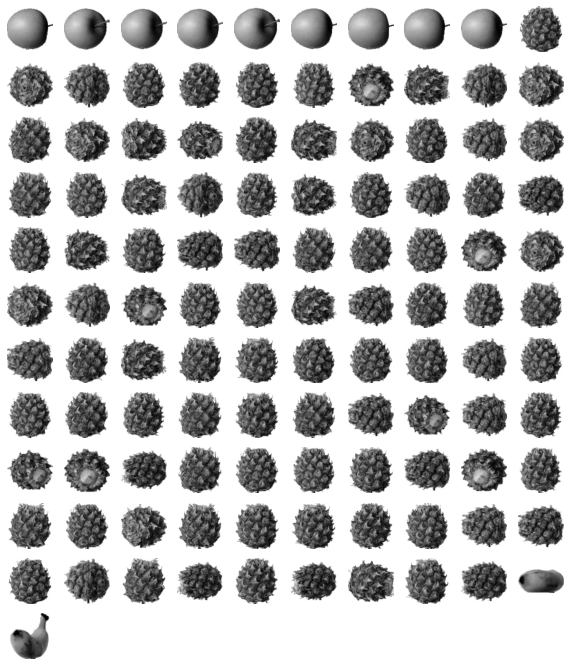

In [ ]:
draw_fruits(fruits[km.labels_==0])

---

k-평균에서 말하는 "거리"란 무엇인가?

과일 이미지의 경우, 이미지 하나는 1 x 10000의 벡터로 볼 수 있음

k-평균은 아래 값이 최소가 되는 centroid를 찾는 것임

$ \sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2) $

$ x_i $가 이미지 하나에 해당되며 $\mu_j$는 클러스터 중심임

n은 뭐지? 클러스터 내에서의 sample 개수인가? 왜 0부터지?

어차피 모든 샘플에 대해서 계산할건데 $\sum_{i=1}^{N}$이어도 되는것 아닌가?

---

(3, 10000)


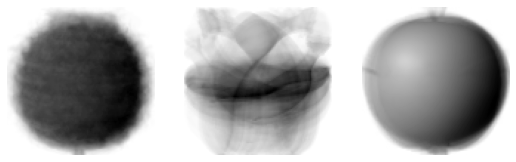

In [ ]:
# KMeans가 찾은 클러스터 중심을 이미지화 해보자
# 과일별 평균 이미지랑 비슷하지 않을까?
print(np.shape(km.cluster_centers_)) # (3, 10000)

draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

---

## 6-3. 주성분 분석

---

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)
print(pca.components_.shape)

(50, 10000)


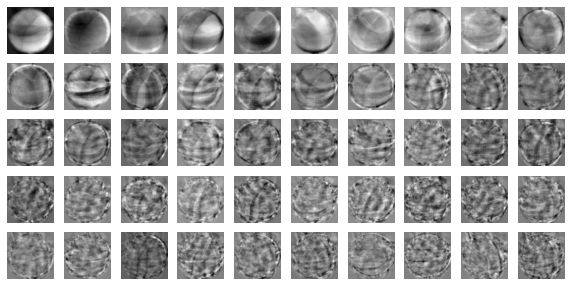

In [46]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

---

위 그림은 과일 이미지의 주성분을 이미지로 표현한 것임

각 이미지를 10000차원의 벡터로 표현했을 때

분산이 가장 큰, 즉 이미지별로 편차가 심한 50개의 방향에 해당됨

이제 각 이미지를 표현하는 데에는

50개의 벡터 방향으로 투영한 결과만 있으면 됨

즉, 각 이미지를 50개 벡터의 linear combination으로 표현하겠다는 것

물론 정보 손실이 발생함

투영은 pca.transform을 사용함

---



In [48]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_2d.shape)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


---

fruits_pca로부터 다시 데이터를 복구할 수 있다.

앞에서 말한 50개 벡터의 linear combination을 하면 됨

손실은 있을 것임

---

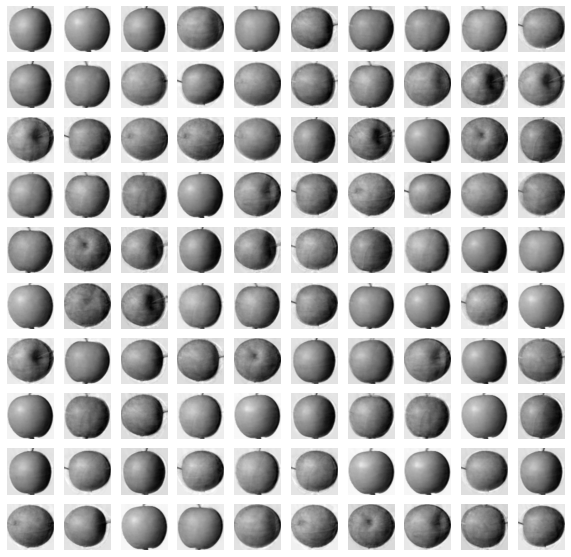

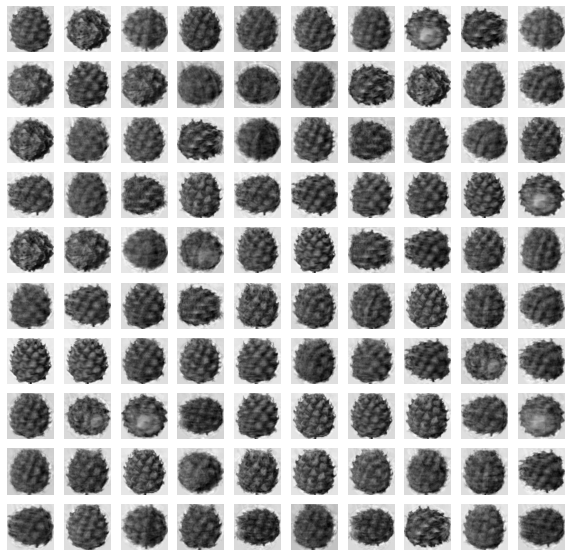

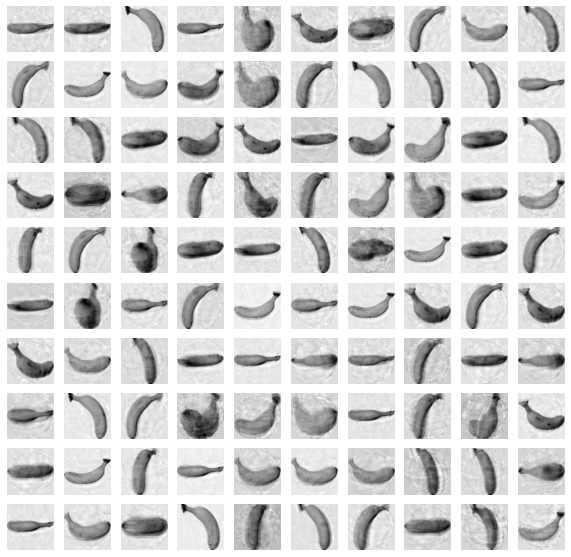

In [50]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')